# Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

# Importing Data

In [2]:
credit_card_data=pd.read_csv("C:/Python Submission/Segmentation/CC GENERAL.csv")

# Missing Value Treatment

In [3]:
credit_card_data['CREDIT_LIMIT'].fillna(credit_card_data['CREDIT_LIMIT'].median(),inplace=True)
credit_card_data['MINIMUM_PAYMENTS'].median()
credit_card_data['MINIMUM_PAYMENTS'].fillna(credit_card_data['MINIMUM_PAYMENTS'].median(),inplace=True)

# Deriving New KPI

### 1. Monthly Average Purchase

In [4]:
credit_card_data['Monthly_ap']=credit_card_data['PURCHASES']/credit_card_data['TENURE']

### 2. Monthly Cash Advance

In [5]:
credit_card_data['Monthly_ca']=credit_card_data['CASH_ADVANCE']/credit_card_data['TENURE']

### 3. Limit Usage Ratio

In [6]:
credit_card_data['limit_usage_ratio']=credit_card_data.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'],axis=1)

#### 4. Payment:Min Payment

In [7]:
credit_card_data['payment_minpayment_ratio']=credit_card_data.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

# Outlier Treatment

In [8]:
#log transformatopn
credit_card_data_log=credit_card_data.drop(['CUST_ID'],axis=1).applymap(lambda x: np.log(x+1))

# Standardzing data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc=StandardScaler()

In [11]:
credit_card_data_log_scaled=sc.fit_transform(credit_card_data_log)

# Dimesion Reduction

In [12]:
from sklearn.decomposition import PCA

In [13]:
var_ratio={}
for n in range (4,15):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(credit_card_data_log_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

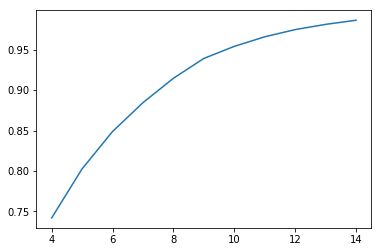

In [14]:
pd.Series(var_ratio).plot()

#### Since 6 Components are explaining about 85% variance so we select 6 components

In [15]:
pc_final=PCA(n_components=6).fit(credit_card_data_log_scaled)

reduced_cr=pc_final.fit_transform(credit_card_data_log_scaled)

In [16]:
col_list=credit_card_data_log.columns

In [17]:
pd.DataFrame(pc_final.components_.T,columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE,-0.144662,0.387557,-0.119601,-0.111047,-0.123326,0.116234
BALANCE_FREQUENCY,-0.016479,0.298761,-0.178288,0.014098,-0.211666,0.436920
PURCHASES,0.312377,0.173386,-0.015731,-0.048341,0.157348,-0.060155
ONEOFF_PURCHASES,0.178951,0.229773,0.156819,-0.435435,0.253131,0.017886
INSTALLMENTS_PURCHASES,0.267605,0.121040,-0.132085,0.395632,-0.038459,-0.122548
CASH_ADVANCE,-0.282725,0.197232,0.178242,0.180715,0.138206,-0.071072
PURCHASES_FREQUENCY,0.304867,0.162305,-0.097524,0.213353,0.099590,0.002414
ONEOFF_PURCHASES_FREQUENCY,0.183314,0.227807,0.170135,-0.364433,0.219648,0.082384
PURCHASES_INSTALLMENTS_FREQUENCY,0.254453,0.114009,-0.170659,0.448480,-0.032153,-0.075938
CASH_ADVANCE_FREQUENCY,-0.246611,0.213931,0.181451,0.210783,0.203431,-0.055692


In [18]:
credit_card_data_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_ap', 'Monthly_ca', 'limit_usage_ratio',
       'payment_minpayment_ratio'],
      dtype='object')

In [19]:
# Removing the variables used for deriving KPIs
my_vars=['BALANCE_FREQUENCY','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
        'PRC_FULL_PAYMENT','Monthly_ap', 'Monthly_ca', 'limit_usage_ratio','payment_minpayment_ratio']

# Clustering using K-means

In [20]:
from sklearn.cluster import KMeans

# 4 Cluster Solution

In [21]:
km_4=KMeans(n_clusters=4,random_state=123)

In [22]:
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [23]:
km_4.labels_

array([3, 1, 0, ..., 3, 1, 2])

In [24]:
pd.Series(km_4.labels_).value_counts()

3    2474
1    2458
0    2436
2    1582
dtype: int64

In [25]:
C4=pd.concat([credit_card_data_log[my_vars],pd.Series(km_4.labels_,name='cluster_4')],axis=1)

In [26]:
C4.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_ap,Monthly_ca,limit_usage_ratio,payment_minpayment_ratio,cluster_4
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,0.000000,2.191654,0.000000,0.040086,0.894662,3
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.200671,0.000000,6.287695,0.376719,1.574068,1
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,0.000000,4.180994,0.000000,0.287197,0.688979,0
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,0.000000,4.835620,2.898616,0.200671,0.000000,3
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.000000,0.847298,0.000000,0.519644,1.327360,1


In [27]:
# Mean value of each variable group by Cluster-4
cluster_4_output=C4.groupby('cluster_4').apply(lambda x: x[my_vars].mean()).T

In [28]:
cluster_4_output

cluster_4,0,1,2,3
BALANCE_FREQUENCY,0.676489,0.639905,0.679667,0.506229
ONEOFF_PURCHASES,5.968092,0.722225,4.891764,1.869839
INSTALLMENTS_PURCHASES,5.110243,0.136660,4.569818,4.038034
PURCHASES_FREQUENCY,0.581066,0.021842,0.497312,0.395083
ONEOFF_PURCHASES_FREQUENCY,0.357382,0.016614,0.237140,0.054074
PURCHASES_INSTALLMENTS_FREQUENCY,0.414913,0.004695,0.362575,0.331963
CASH_ADVANCE_FREQUENCY,0.007542,0.225882,0.268864,0.006873
CASH_ADVANCE_TRX,0.067279,1.629820,1.901061,0.056500
PURCHASES_TRX,3.118831,0.179148,2.681810,1.890622
PRC_FULL_PAYMENT,0.172785,0.028833,0.030556,0.207587


In [29]:
# Mean of variables
my_vars_means=credit_card_data_log.mean()
my_vars_means

BALANCE                             6.161637
BALANCE_FREQUENCY                   0.619940
PURCHASES                           4.899647
ONEOFF_PURCHASES                    3.204274
INSTALLMENTS_PURCHASES              3.352403
CASH_ADVANCE                        3.319086
PURCHASES_FREQUENCY                 0.361268
ONEOFF_PURCHASES_FREQUENCY          0.158699
PURCHASES_INSTALLMENTS_FREQUENCY    0.270072
CASH_ADVANCE_FREQUENCY              0.113512
CASH_ADVANCE_TRX                    0.817570
PURCHASES_TRX                       1.894731
CREDIT_LIMIT                        8.094825
PAYMENTS                            6.624540
MINIMUM_PAYMENTS                    5.916079
PRC_FULL_PAYMENT                    0.117730
TENURE                              2.519680
Monthly_ap                          3.050877
Monthly_ca                          2.163970
limit_usage_ratio                   0.296081
payment_minpayment_ratio            1.357600
dtype: float64

In [30]:
# Mode of variables
my_vars_median=credit_card_data_log.median()
my_vars_median

BALANCE                             6.773521
BALANCE_FREQUENCY                   0.693147
PURCHASES                           5.892417
ONEOFF_PURCHASES                    3.663562
INSTALLMENTS_PURCHASES              4.499810
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.405465
ONEOFF_PURCHASES_FREQUENCY          0.080042
PURCHASES_INSTALLMENTS_FREQUENCY    0.154151
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       2.079442
CREDIT_LIMIT                        8.006701
PAYMENTS                            6.754489
MINIMUM_PAYMENTS                    5.747301
PRC_FULL_PAYMENT                    0.000000
TENURE                              2.564949
Monthly_ap                          3.494587
Monthly_ca                          0.000000
limit_usage_ratio                   0.264455
payment_minpayment_ratio            1.109459
dtype: float64

In [31]:
# Share of each cluster

s=C4.groupby('cluster_4').apply(lambda x: x['cluster_4'].value_counts())
per=pd.Series((s.values.astype('float')/ C4['cluster_4'].shape[0])*100,name='Percentage')
print ("Cluster 4")
print (pd.concat ([pd.Series(s.values,name='Size'),per],axis=1))

Cluster 4
   Size  Percentage
0  2436   27.217877
1  2458   27.463687
2  1582   17.675978
3  2474   27.642458


# 5 Cluster Solution

In [32]:
km_5=KMeans(n_clusters=5,random_state=123)

In [33]:
km_5.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [34]:
km_5.labels_

array([0, 4, 2, ..., 0, 4, 1])

In [35]:
pd.Series(km_5.labels_).value_counts()

4    2344
0    2040
3    1577
2    1533
1    1456
dtype: int64

In [36]:
C5=pd.concat([credit_card_data_log[my_vars],pd.Series(km_5.labels_,name='cluster_5')],axis=1)

In [37]:
C5.head(5)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_ap,Monthly_ca,limit_usage_ratio,payment_minpayment_ratio,cluster_5
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,0.000000,2.191654,0.000000,0.040086,0.894662,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.200671,0.000000,6.287695,0.376719,1.574068,4
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,0.000000,4.180994,0.000000,0.287197,0.688979,2
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,0.000000,4.835620,2.898616,0.200671,0.000000,2
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.000000,0.847298,0.000000,0.519644,1.327360,2


In [38]:
# Mean value of each variable group by Cluster-5
cluster_5_output=C5.groupby('cluster_5').apply(lambda x: x[my_vars].mean()).T

In [39]:
cluster_5_output

cluster_5,0,1,2,3,4
BALANCE_FREQUENCY,0.471667,0.678981,0.684304,0.667514,0.638206
ONEOFF_PURCHASES,1.607545,5.002104,3.939956,6.798783,0.577715
INSTALLMENTS_PURCHASES,4.286509,4.596027,3.508009,5.659006,0.113348
PURCHASES_FREQUENCY,0.415385,0.500833,0.408998,0.627541,0.017117
ONEOFF_PURCHASES_FREQUENCY,0.045891,0.243639,0.162571,0.439020,0.012988
PURCHASES_INSTALLMENTS_FREQUENCY,0.358504,0.364993,0.276736,0.457608,0.003618
CASH_ADVANCE_FREQUENCY,0.007512,0.282348,0.013599,0.011279,0.235016
CASH_ADVANCE_TRX,0.061128,1.979969,0.124474,0.097832,1.691389
PURCHASES_TRX,1.934768,2.703849,2.180463,3.422792,0.142370
PRC_FULL_PAYMENT,0.246229,0.031699,0.010536,0.266333,0.029465


In [40]:
s1=C5.groupby('cluster_5').apply(lambda x: x['cluster_5'].value_counts())
print ('\n',s1)


 cluster_5   
0          0    2040
1          1    1456
2          2    1533
3          3    1577
4          4    2344
Name: cluster_5, dtype: int64


In [41]:
# percentage of each cluster
print ("Cluster-5",'\n')
per_5=pd.Series((s1.values.astype('float')/C5.shape[0])*100,name='Percentage')
print (pd.concat((pd.Series(s1.values,name='size'),per_5),axis=1))

Cluster-5 

   size  Percentage
0  2040   22.793296
1  1456   16.268156
2  1533   17.128492
3  1577   17.620112
4  2344   26.189944


# 6 Cluster Solution

In [42]:
km_6=KMeans(n_clusters=6,random_state=123)

In [43]:
km_6.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [44]:
km_6.labels_

array([2, 1, 3, ..., 5, 2, 4])

In [45]:
pd.Series(km_6.labels_).value_counts()

1    2233
0    1484
5    1455
4    1431
3    1428
2     919
dtype: int64

In [46]:
C6=pd.concat([credit_card_data_log[my_vars],pd.Series(km_6.labels_,name='cluster_6')],axis=1)

In [47]:
C6.head(5)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_ap,Monthly_ca,limit_usage_ratio,payment_minpayment_ratio,cluster_6
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,0.000000,2.191654,0.000000,0.040086,0.894662,2
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.200671,0.000000,6.287695,0.376719,1.574068,1
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,0.000000,4.180994,0.000000,0.287197,0.688979,3
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,0.000000,4.835620,2.898616,0.200671,0.000000,2
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.000000,0.847298,0.000000,0.519644,1.327360,3


In [48]:
# Mean value of each variable group by Cluster-6
cluster_6_output=C6.groupby('cluster_6').apply(lambda x: x[my_vars].mean()).T

In [49]:
cluster_6_output

cluster_6,0,1,2,3,4,5
BALANCE_FREQUENCY,0.665510,0.654564,0.314868,0.685061,0.679115,0.590899
ONEOFF_PURCHASES,7.166017,0.573791,2.862660,4.047577,5.022481,0.800491
INSTALLMENTS_PURCHASES,5.425212,0.123932,1.507995,3.465724,4.632959,5.987346
PURCHASES_FREQUENCY,0.619456,0.017033,0.155670,0.400030,0.504359,0.577317
ONEOFF_PURCHASES_FREQUENCY,0.471360,0.012527,0.080748,0.165575,0.245871,0.020890
PURCHASES_INSTALLMENTS_FREQUENCY,0.430045,0.003974,0.070495,0.267793,0.368029,0.547240
CASH_ADVANCE_FREQUENCY,0.011925,0.241612,0.029353,0.014481,0.283223,0.003968
CASH_ADVANCE_TRX,0.104862,1.725704,0.254887,0.132116,1.984231,0.031479
PURCHASES_TRX,3.429305,0.142937,1.029240,2.163542,2.723147,2.486144
PRC_FULL_PAYMENT,0.255163,0.027556,0.104212,0.008044,0.031550,0.316898


In [50]:
s1=C6.groupby('cluster_6').apply(lambda x: x['cluster_6'].value_counts())
print ('\n',s1)


 cluster_6   
0          0    1484
1          1    2233
2          2     919
3          3    1428
4          4    1431
5          5    1455
Name: cluster_6, dtype: int64


In [51]:
# percentage of each cluster
print ("Cluster-6",'\n')
per_6=pd.Series((s1.values.astype('float')/C6.shape[0])*100,name='Percentage')
print (pd.concat((pd.Series(s1.values,name='size'),per_6),axis=1))

Cluster-6 

   size  Percentage
0  1484   16.581006
1  2233   24.949721
2   919   10.268156
3  1428   15.955307
4  1431   15.988827
5  1455   16.256983


# 7 Cluster Solution

In [52]:
km_7=KMeans(n_clusters=7,random_state=123)

In [53]:
km_7.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [54]:
km_7.labels_

array([5, 0, 6, ..., 1, 5, 6])

In [55]:
pd.Series(km_7.labels_).value_counts()

0    2196
1    1425
3    1316
2    1303
6    1047
4     904
5     759
dtype: int64

In [56]:
C7=pd.concat([credit_card_data_log[my_vars],pd.Series(km_7.labels_,name='cluster_7')],axis=1)

In [57]:
C7.head(5)

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PRC_FULL_PAYMENT,Monthly_ap,Monthly_ca,limit_usage_ratio,payment_minpayment_ratio,cluster_7
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,0.000000,2.191654,0.000000,0.040086,0.894662,5
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.200671,0.000000,6.287695,0.376719,1.574068,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,0.000000,4.180994,0.000000,0.287197,0.688979,6
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,0.000000,4.835620,2.898616,0.200671,0.000000,6
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.000000,0.847298,0.000000,0.519644,1.327360,6


In [58]:
# Mean value of each variable group by Cluster-4
cluster_7_output=C7.groupby('cluster_7').apply(lambda x: x[my_vars].mean()).T

In [59]:
cluster_7_output

cluster_7,0,1,2,3,4,5,6
BALANCE_FREQUENCY,0.655009,0.582874,0.678995,0.666088,0.688297,0.277226,0.654753
ONEOFF_PURCHASES,0.507211,0.872220,5.202949,7.226742,2.484707,2.294150,5.772909
INSTALLMENTS_PURCHASES,0.129408,5.932527,4.602336,5.757093,6.070871,1.609902,0.938701
PURCHASES_FREQUENCY,0.015880,0.565942,0.497251,0.631018,0.565932,0.143854,0.279732
ONEOFF_PURCHASES_FREQUENCY,0.011168,0.022605,0.255508,0.481171,0.093494,0.059716,0.255615
PURCHASES_INSTALLMENTS_FREQUENCY,0.004148,0.533998,0.358984,0.456898,0.533746,0.079292,0.033774
CASH_ADVANCE_FREQUENCY,0.242652,0.004117,0.299306,0.012163,0.024736,0.033200,0.022582
CASH_ADVANCE_TRX,1.731255,0.031610,2.070526,0.106531,0.231991,0.294633,0.190006
PURCHASES_TRX,0.131629,2.449660,2.720461,3.514846,2.738717,0.938928,1.737606
PRC_FULL_PAYMENT,0.028199,0.324695,0.032468,0.276667,0.013443,0.102077,0.031557


In [60]:
s1=C7.groupby('cluster_7').apply(lambda x: x['cluster_7'].value_counts())
print ('\n',s1)


 cluster_7   
0          0    2196
1          1    1425
2          2    1303
3          3    1316
4          4     904
5          5     759
6          6    1047
Name: cluster_7, dtype: int64


In [61]:
# percentage of each cluster
print ("Cluster-7",'\n')
per_7=pd.Series((s1.values.astype('float')/C7.shape[0])*100,name='Percentage')
print (pd.concat((pd.Series(s1.values,name='size'),per_7),axis=1))

Cluster-7 

   size  Percentage
0  2196   24.536313
1  1425   15.921788
2  1303   14.558659
3  1316   14.703911
4   904   10.100559
5   759    8.480447
6  1047   11.698324


In [62]:
C4.to_excel('C:/Python/3 Credit Card Case Study- Segmentation/C4.xls')
C5.to_excel('C:/Python/3 Credit Card Case Study- Segmentation/C5.xls')
C6.to_excel('C:/Python/3 Credit Card Case Study- Segmentation/C6.xls')
C7.to_excel('C:/Python/3 Credit Card Case Study- Segmentation/C7.xls')